
DS5010 Final Project 

test_functions tests many of the major functions for Easy_EPA 

This is across various python files: 'epa_webscraper.py', 'url_storage.py', 'input_validation.py', 'Easy_EPA.py', and 'backend_functions.py'

Simple print functions are employed to show expected outcomes for comparison


In [2]:
from url_storage import *
from epa_webscraper import *
from Easy_EPA import *
from input_validation import *
import pandas as pd
import matplotlib.pyplot as plt


# Testing epa_webscraper functions

In [3]:
url_library_txt_unclean = "url_library_unclean.txt"
url_library_txt = "url_library.txt"

get_library_clean(False)
print(count_lines(url_library_txt)) # expect more lines of text pre-cleaning
print(count_lines(url_library_txt_unclean)) 


url_library.txt generated
The file 'url_library.txt' has 1917 lines.
1917
The file 'url_library_unclean.txt' has 1974 lines.
1974


In [4]:
print('Reading unclearn library txt... expect irrelevant HTML links from EPA website')
head_five(url_library_txt_unclean)


Reading unclearn library txt... expect irrelevant HTML links from EPA website
<a class="skip-link element-invisible element-focusable" href="#main-content">Jump to main content</a>
<a href="https://www.epa.gov/" rel="home" title="Go to the home page"><span>US EPA</span></a>
<a href="mailto:aqsdatamart@epa.gov">Contact Us</a>
<a href="https://www.epa.gov/outdoor-air-quality-data">Air Data Home</a>
<a href="#Meta">Site and Monitor Descriptions</a>


In [5]:
print('Reading CLEANED library text... expect only relevant HTML zip file links from EPA website')
head_five(url_library_txt)

Reading CLEANED library text... expect only relevant HTML zip file links from EPA website
annual_conc_by_monitor_2023.zip
annual_aqi_by_cbsa_2023.zip
annual_aqi_by_county_2023.zip
annual_conc_by_monitor_2022.zip
annual_aqi_by_cbsa_2022.zip


# Testing URL_storage

In [6]:
'''
url_storage testing will firstly validate certain essential functions in isolation, then prove successful download of csv_files for backend_functions.py testing
'''

'\nurl_storage testing will firstly validate certain essential functions in isolation, then prove successful download of csv_files for backend_functions.py testing\n'

In [7]:
# Testing storage

storage = get_storage() # get storage to drive testing

storage.head(5) #  visually looking at library.txt, expect daily_aqi_by_county files in desecending order, starting with 2023

,csv_file_name,variable,period,year,zip_file_name,url,accessed
0,daily_aqi_by_county_2023.csv,AQI,daily,2023,daily_aqi_by_county_2023.zip,https://aqs.epa.gov/aqsweb/airdata/daily_aqi_b...,False
1,daily_aqi_by_county_2022.csv,AQI,daily,2022,daily_aqi_by_county_2022.zip,https://aqs.epa.gov/aqsweb/airdata/daily_aqi_b...,False
2,daily_aqi_by_county_2021.csv,AQI,daily,2021,daily_aqi_by_county_2021.zip,https://aqs.epa.gov/aqsweb/airdata/daily_aqi_b...,False
3,daily_aqi_by_county_2020.csv,AQI,daily,2020,daily_aqi_by_county_2020.zip,https://aqs.epa.gov/aqsweb/airdata/daily_aqi_b...,False
4,daily_aqi_by_county_2019.csv,AQI,daily,2019,daily_aqi_by_county_2019.zip,https://aqs.epa.gov/aqsweb/airdata/daily_aqi_b...,False


In [8]:
print(get_storage_row(storage, 'AQI', '2022', 'daily')) #expect row index 1 for daily AQI 2022
get_csv_from_row(storage, 1) # expect daily_aqi_by_county_2022.csv
get_zip_from_row(storage, 1) # expect daily_aqi_by_county_2022.zip


1
daily_aqi_by_county_2022.csv
daily_aqi_by_county_2022.zip


'daily_aqi_by_county_2022.zip'

In [9]:
# Checking download drive and various directory managment functions.
# ENSURE CSV_FOLDER is DELETED prior to testing
download_driver(storage, 'AQI', '2022', 'daily')
'''
csv_folder' does not exist within your current directory'
Generating 'csv_folder' for you...
File downloaded successfully and saved as 'daily_aqi_by_county_2022.zip'
Contents extracted to '/path/csv_folder'
'''
print("\nNow that csv_folder is downloaded: expect csv_folder exists within your current directory")
print(check_for_csv_folder())


daily_aqi_by_county_2022.csv
daily_aqi_by_county_2022.csv already exists in your csv_folder

Now that csv_folder is downloaded: expect csv_folder exists within your current directory
/Users/eitan/Documents/DS5010/FInal Project/Final Project venv/csv_folder


# AQI .csv file (daily)

In [10]:
# Testing accessing an AQI csv file
file1 = download_driver(storage, 'AQI', '2022', 'daily')
path1 = path_builder(file1)
df = pd.read_csv(path1)
print(df.columns)
df['State Name'].drop_duplicates() # Checking what values are stored
df['Category'].drop_duplicates()
# All states plus DC and Mexico included
# Note that 2023 files are only updated to around October

daily_aqi_by_county_2022.csv
daily_aqi_by_county_2022.csv already exists in your csv_folder
Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')


0                                  Good
20                             Moderate
1421     Unhealthy for Sensitive Groups
5354                          Unhealthy
5528                     Very Unhealthy
10111                         Hazardous
Name: Category, dtype: object

In [11]:
file1 = 'daily_aqi_by_county_2022.csv'
year1 = '2022'
state1 = 'Alabama'

# Test the function
aqi_yearly_finder(path1, year1, state1)

The AQI in Alabama in 2022 was recorded for 15 Alabama counties, and a total of 365 days were recorded. The average AQI was 38.1 and the maximum recorded AQI was 111.0. (AQI's over 100 are considered unhealthy for sensitive groups.)


# Temperature .csv file (daily)

In [12]:
# testing accessing a temperature csv file
file2 = download_driver(storage, 'Temperature', '2022', 'daily')
path2 = path_builder(file2)
# file2 = 'daily_TEMP_2022.csv'
df2 = pd.read_csv(path2) 
print(df2.columns)
df2['State Name'].drop_duplicates() # Missing 4 states: Delaware, NY, NJ, Vermont
df2['Units of Measure'].drop_duplicates() # All recorded in Farenheit
# df2['County Name'].head()

daily_TEMP_2022.csv
daily_TEMP_2022.csv already exists in your csv_folder
Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')


0    Degrees Fahrenheit
Name: Units of Measure, dtype: object

# Testing AQI yearly summary functions:

In [13]:
# Testing yearly summary function
file3 = download_driver(storage, 'AQI', '2022', 'daily')
path3 = path_builder(file3)
# file3 = 'daily_AQI_by_county_2022.csv'
aqi_yearly_finder(path3, '2022', 'Texas')

daily_aqi_by_county_2022.csv
daily_aqi_by_county_2022.csv already exists in your csv_folder
The AQI in Texas in 2022 was recorded for 45 Texas counties, and a total of 365 days were recorded. The average AQI was 40.6 and the maximum recorded AQI was 194.0. (AQI's over 100 are considered unhealthy for sensitive groups.)


# Testing Temperature Yearly Finder

In [14]:
# Test the function
file4 = download_driver(storage, 'Temperature', '2021', 'daily')
path4 = path_builder(file4)
# file4 = 'daily_TEMP_2021.csv'
df2 = pd.read_csv(path4) 
temp_yearly_finder(path4, '2021', 'Massachusetts')

daily_TEMP_2021.csv
daily_TEMP_2021.csv already exists in your csv_folder
The temperature in Massachusetts was recorded across 10 Massachusetts counties, and a total of 365 days were recorded in 2021. The average temperature was 60.9 degrees Farenheit across 10 counties. The highest temperature recorded for Massachusetts in 2021 was  100.0 degrees Farenheit.


# Yearly plots

daily_aqi_by_county_1985.csv
daily_aqi_by_county_1985.csv already exists in your csv_folder


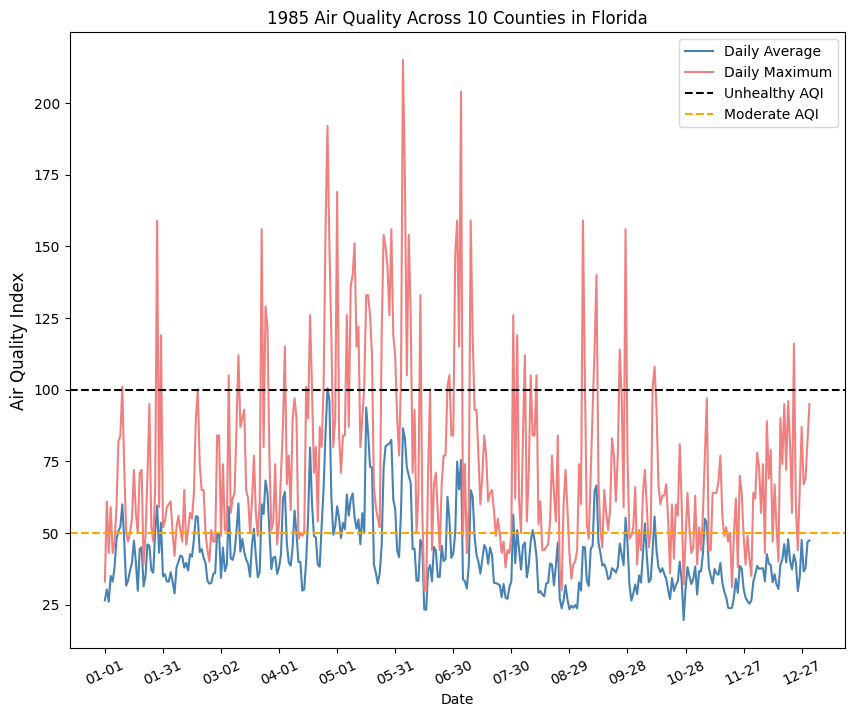

In [15]:
# Testing AQI Yearly plot
file5 = download_driver(storage, 'AQI', '1985', 'daily')
path5 = path_builder(file5)
# file5 = 'daily_aqi_by_county_1985.csv'
df2 = pd.read_csv(path5) 
aqi_yearly_plot(path5, '1985', 'Florida')

daily_TEMP_2004.csv
daily_TEMP_2004.csv already exists in your csv_folder


/Users/eitan/Documents/DS5010/FInal Project/Final Project venv/backend_functions.py:193: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


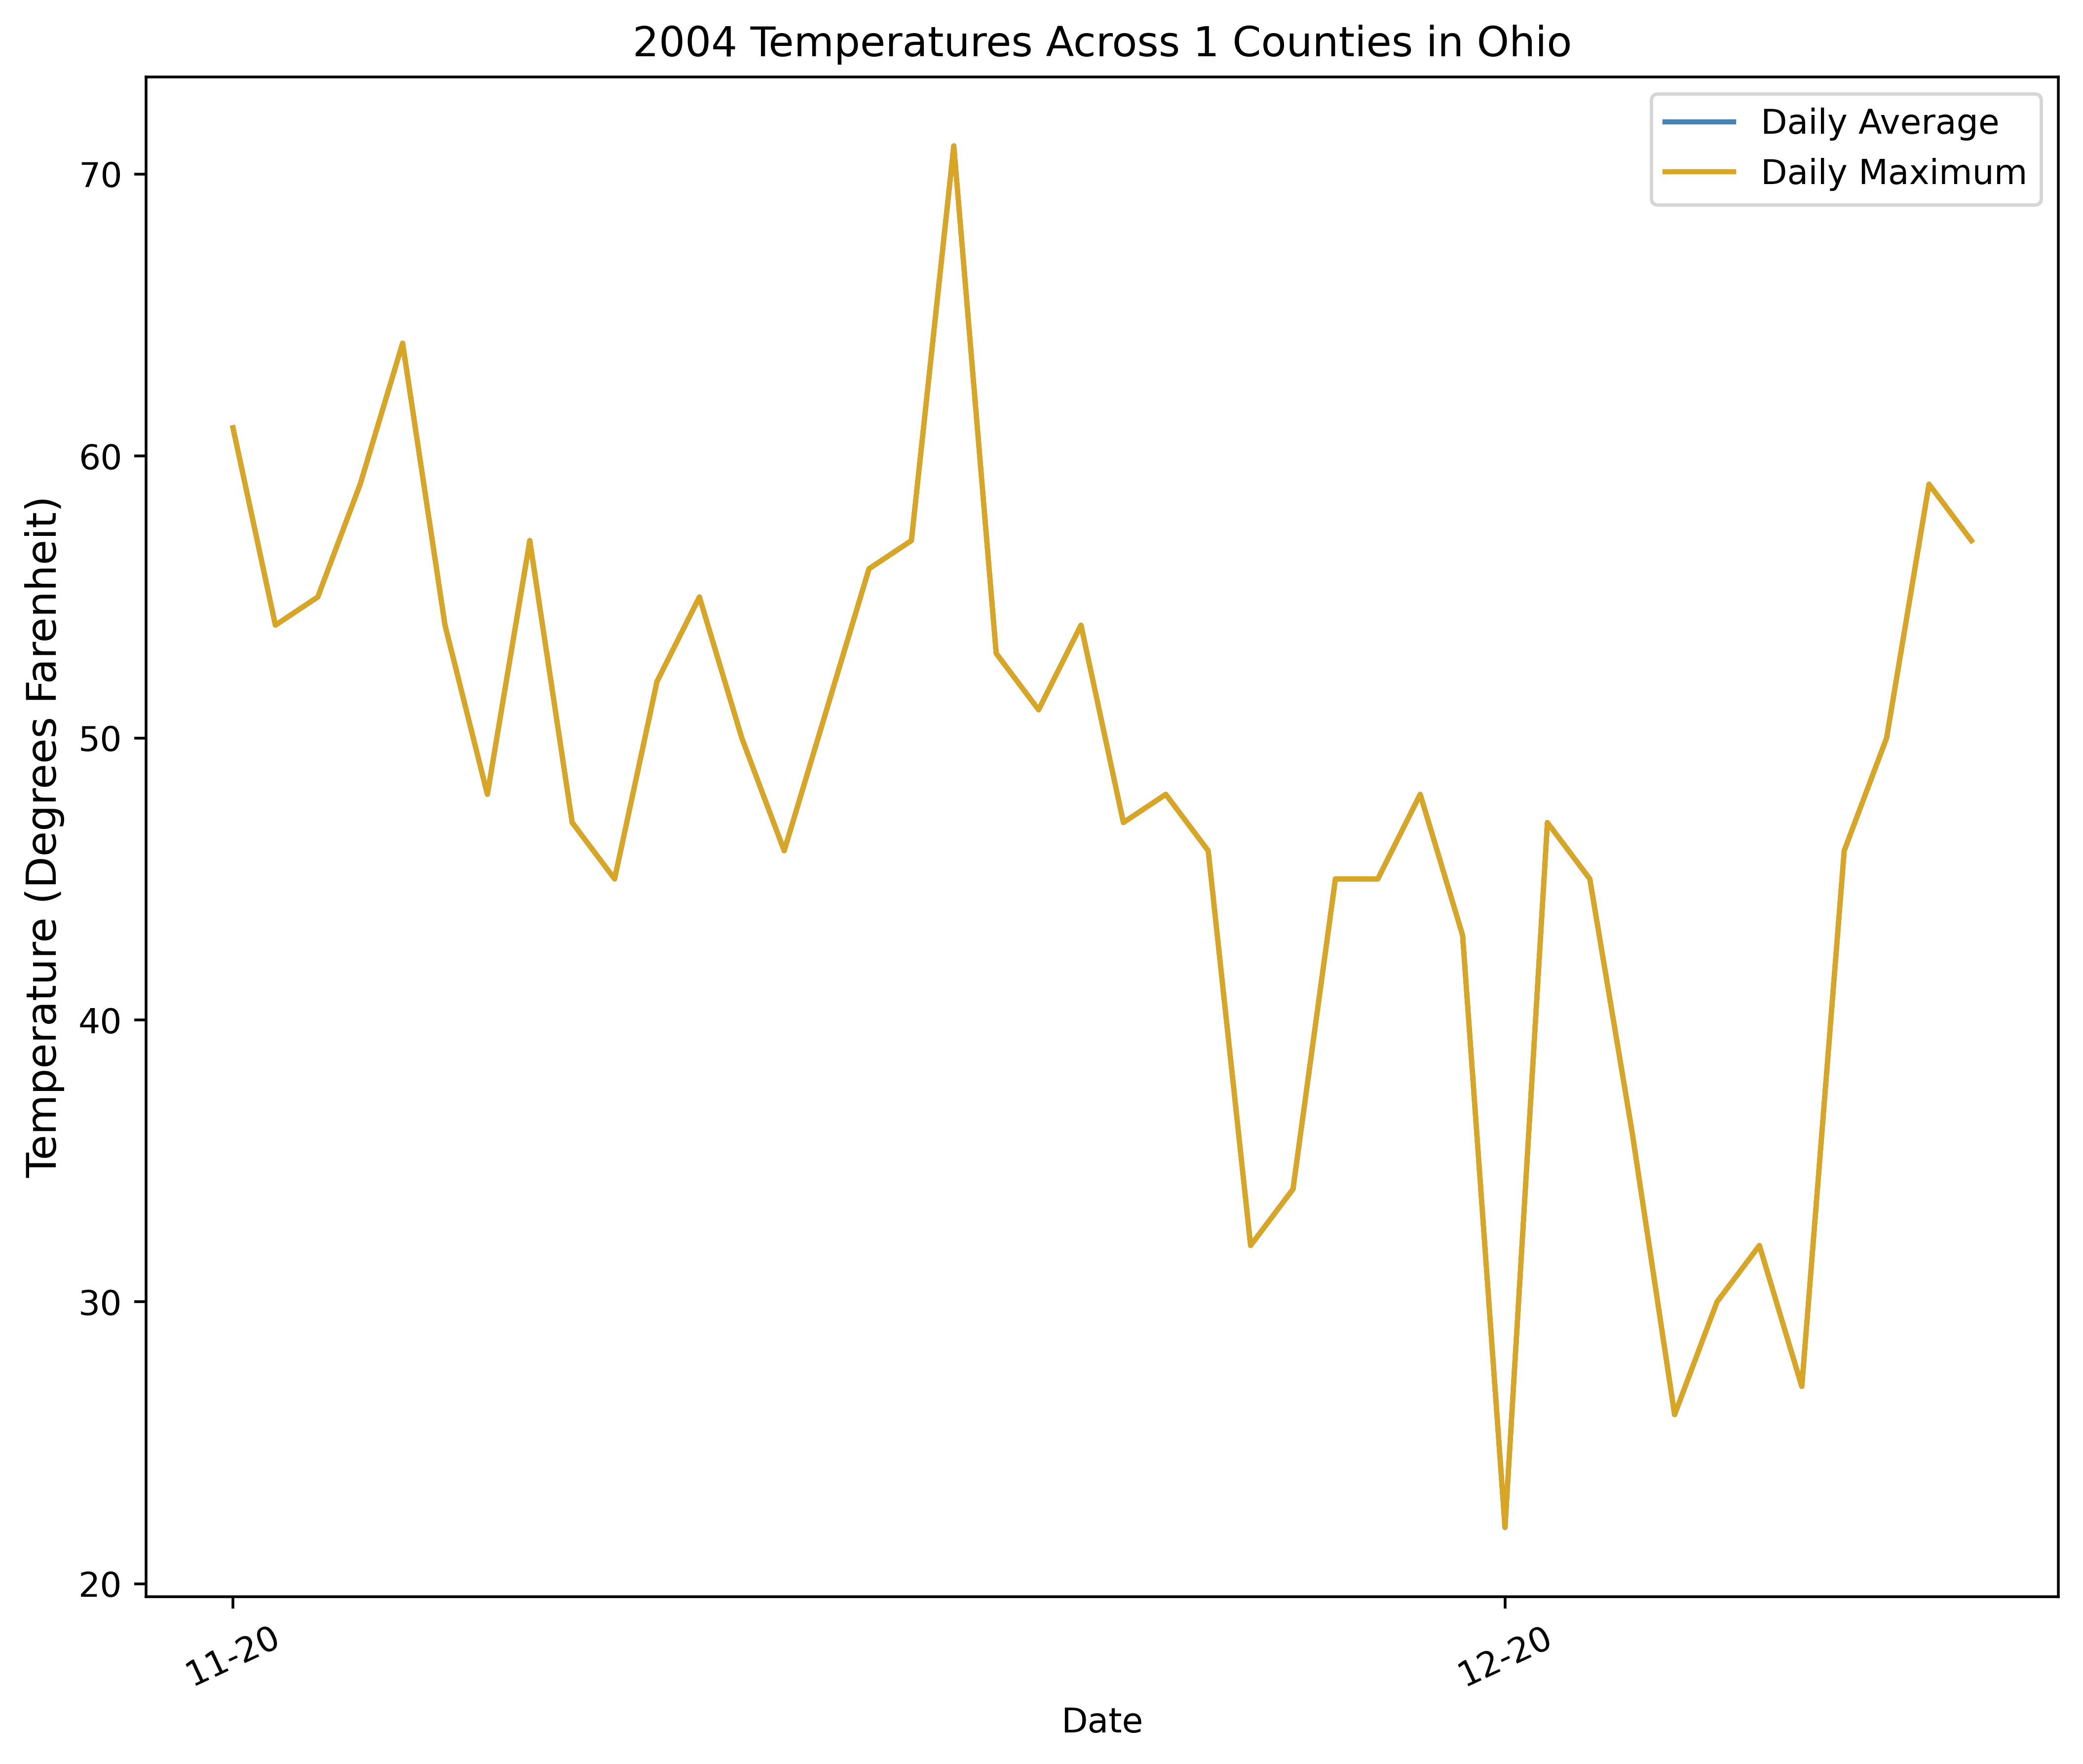

In [16]:
# Testing Temp yearly plot
file6 = download_driver(storage, 'Temperature', '2004', 'daily')
path6 = path_builder(file6)
# file6 = 'daily_TEMP_2004.csv'
temp_yearly_plot(path6, '2004', 'Ohio')

daily_44201_2022.csv
daily_44201_2022.csv already exists in your csv_folder
daily_42101_2022.csv
daily_42101_2022.csv already exists in your csv_folder
daily_42401_2022.csv
daily_42401_2022.csv already exists in your csv_folder
daily_42602_2022.csv
daily_42602_2022.csv already exists in your csv_folder


/Users/eitan/Documents/DS5010/FInal Project/Final Project venv/backend_functions.py:236: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  ozone = pd.read_csv(ozone_file)
/Users/eitan/Documents/DS5010/FInal Project/Final Project venv/backend_functions.py:237: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  co2 = pd.read_csv(co2_file)
/Users/eitan/Documents/DS5010/FInal Project/Final Project venv/backend_functions.py:238: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  so2 = pd.read_csv(so2_file)
/Users/eitan/Documents/DS5010/FInal Project/Final Project venv/backend_functions.py:239: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  no2 = pd.read_csv(no2_file)


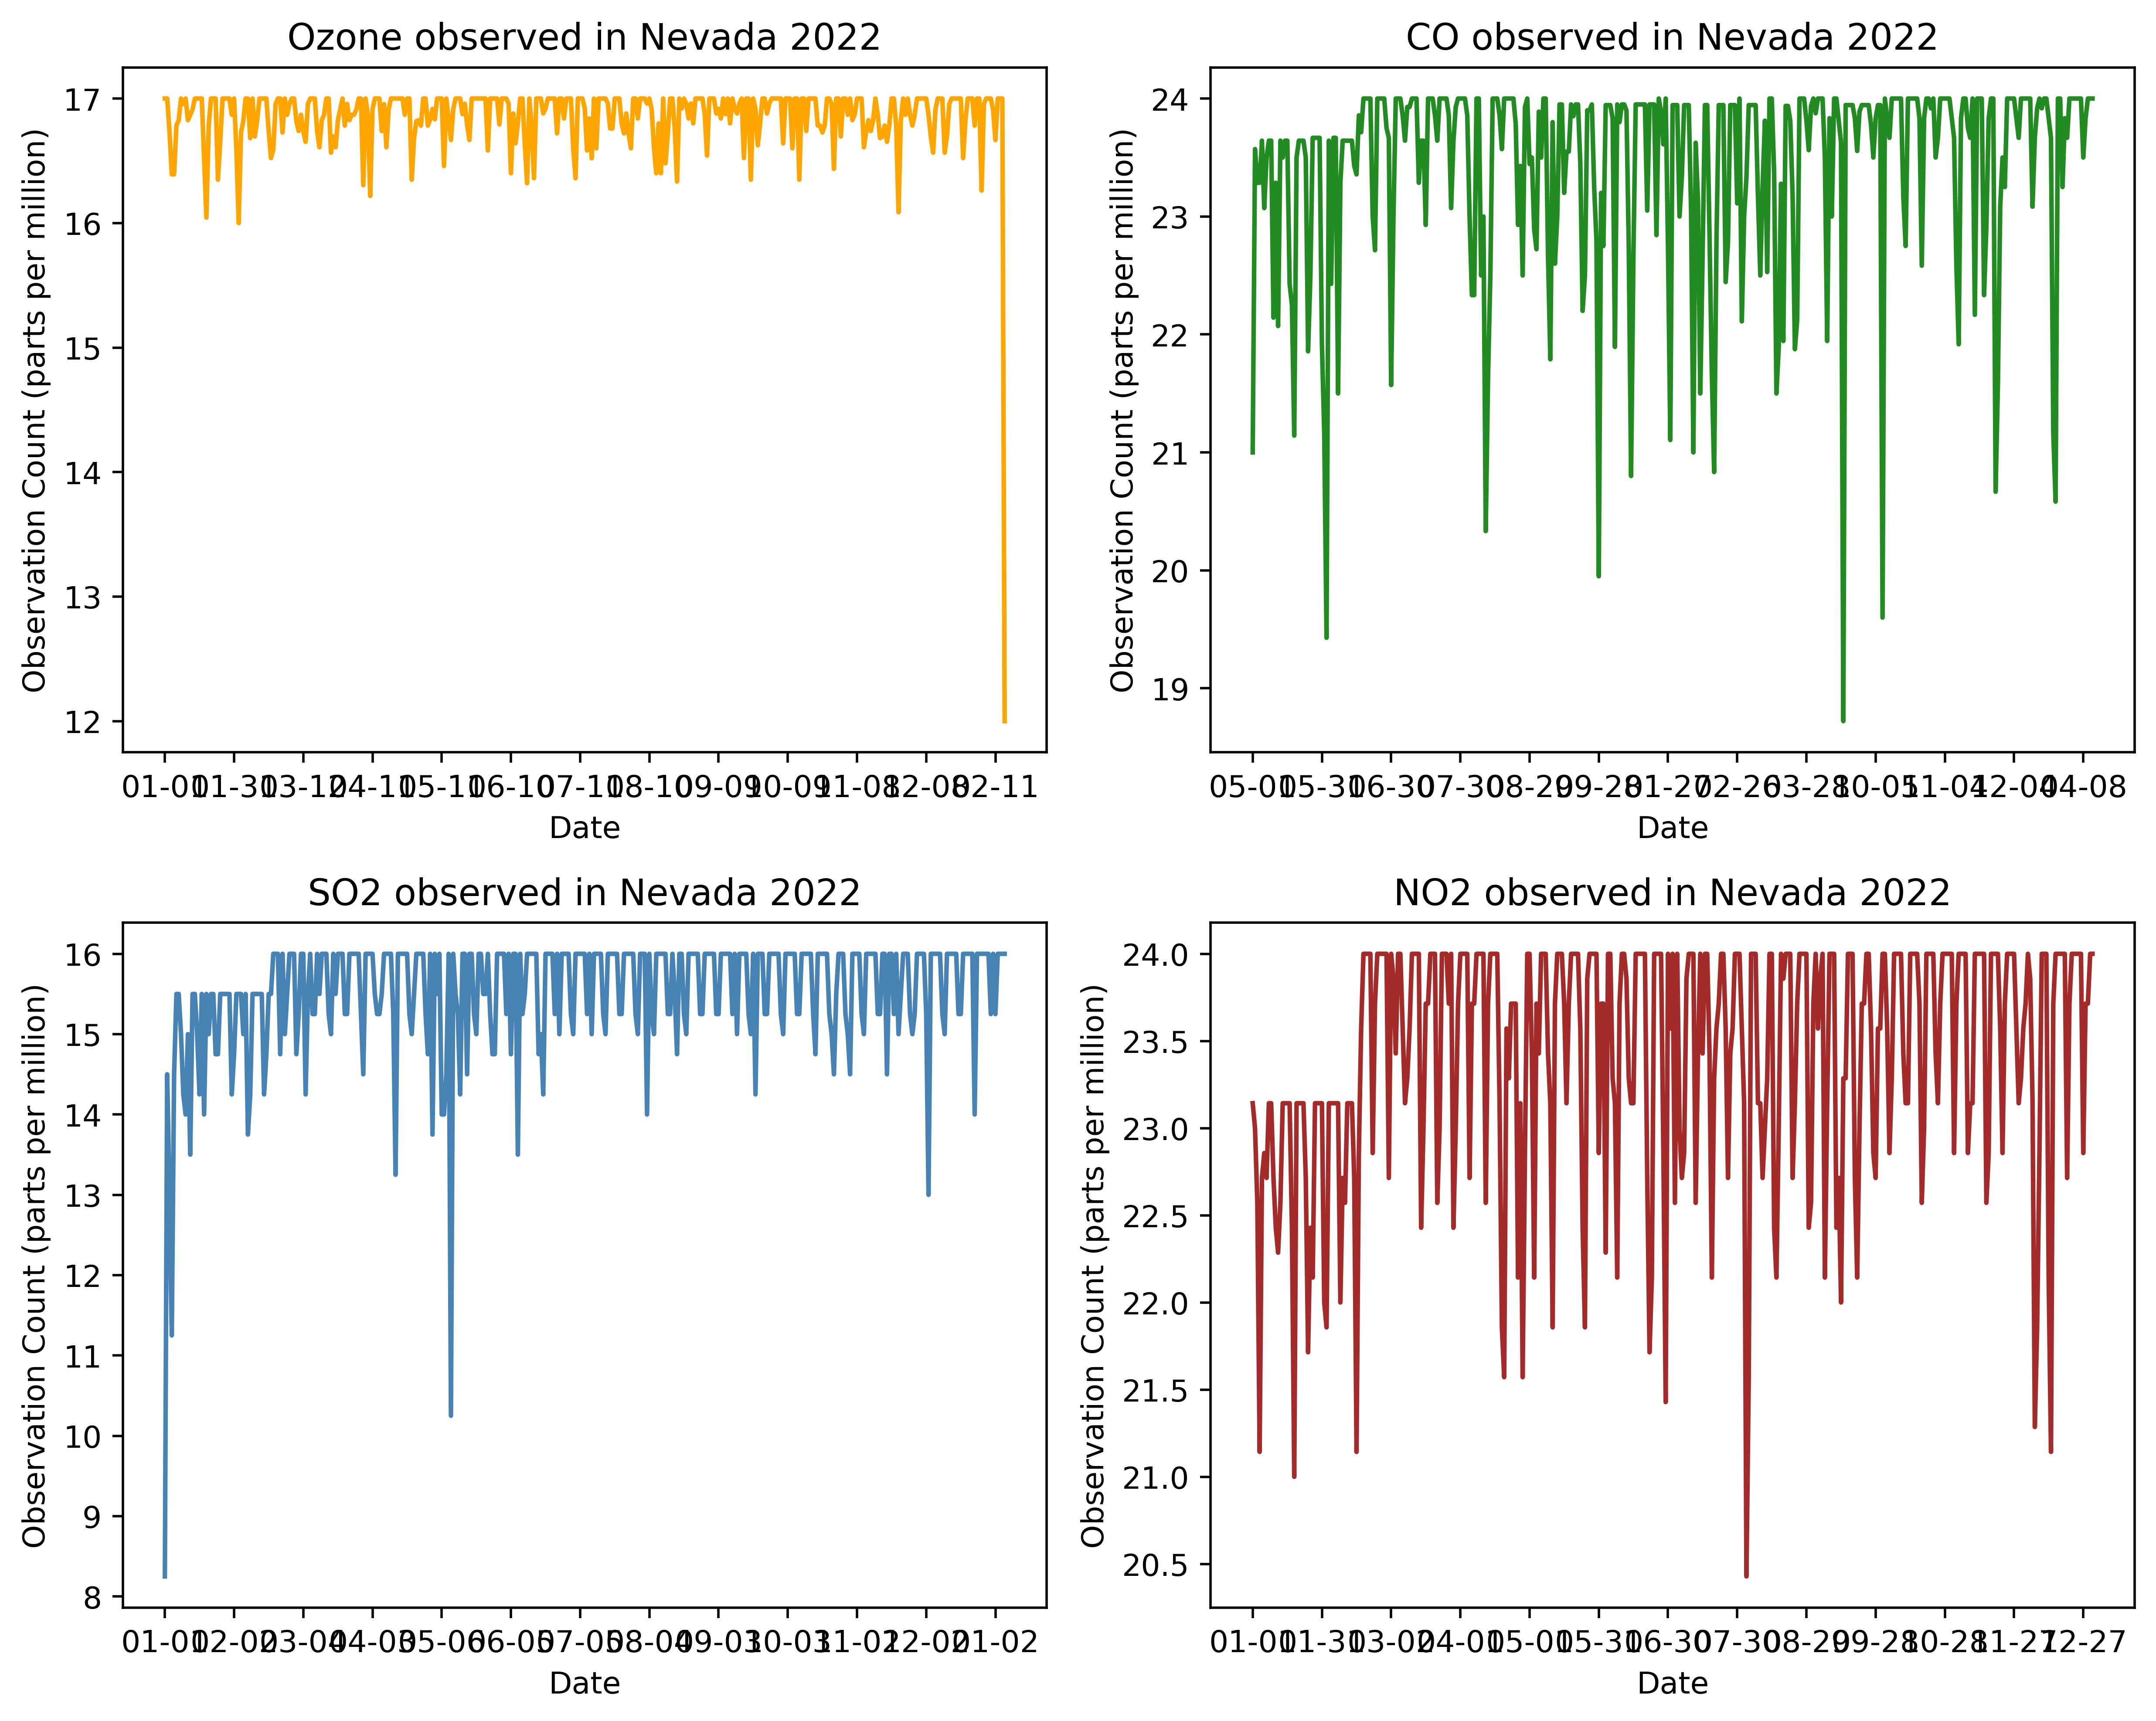

In [17]:
# Testing criteria gases function
file_ozone = download_driver(storage, 'Ozone', '2022', 'daily')
path_ozone = path_builder(file_ozone)
file_co2 = download_driver(storage, 'CO', '2022', 'daily')
path_co2 = path_builder(file_co2)
file_so2 = download_driver(storage, 'SO2', '2022', 'daily')
path_so2 = path_builder(file_so2)
file_no2 = download_driver(storage, 'NO2', '2022', 'daily')
path_no2 = path_builder(file_no2)
# file2 = 'daily_TEMP_2022.csv'
df2 = pd.read_csv(path2) 
criteria_gases_plot(path_ozone, path_co2, path_so2, path_no2, '2022', 'Nevada')

# Comparing states:

daily_TEMP_1999.csv
daily_TEMP_1999.csv already exists in your csv_folder


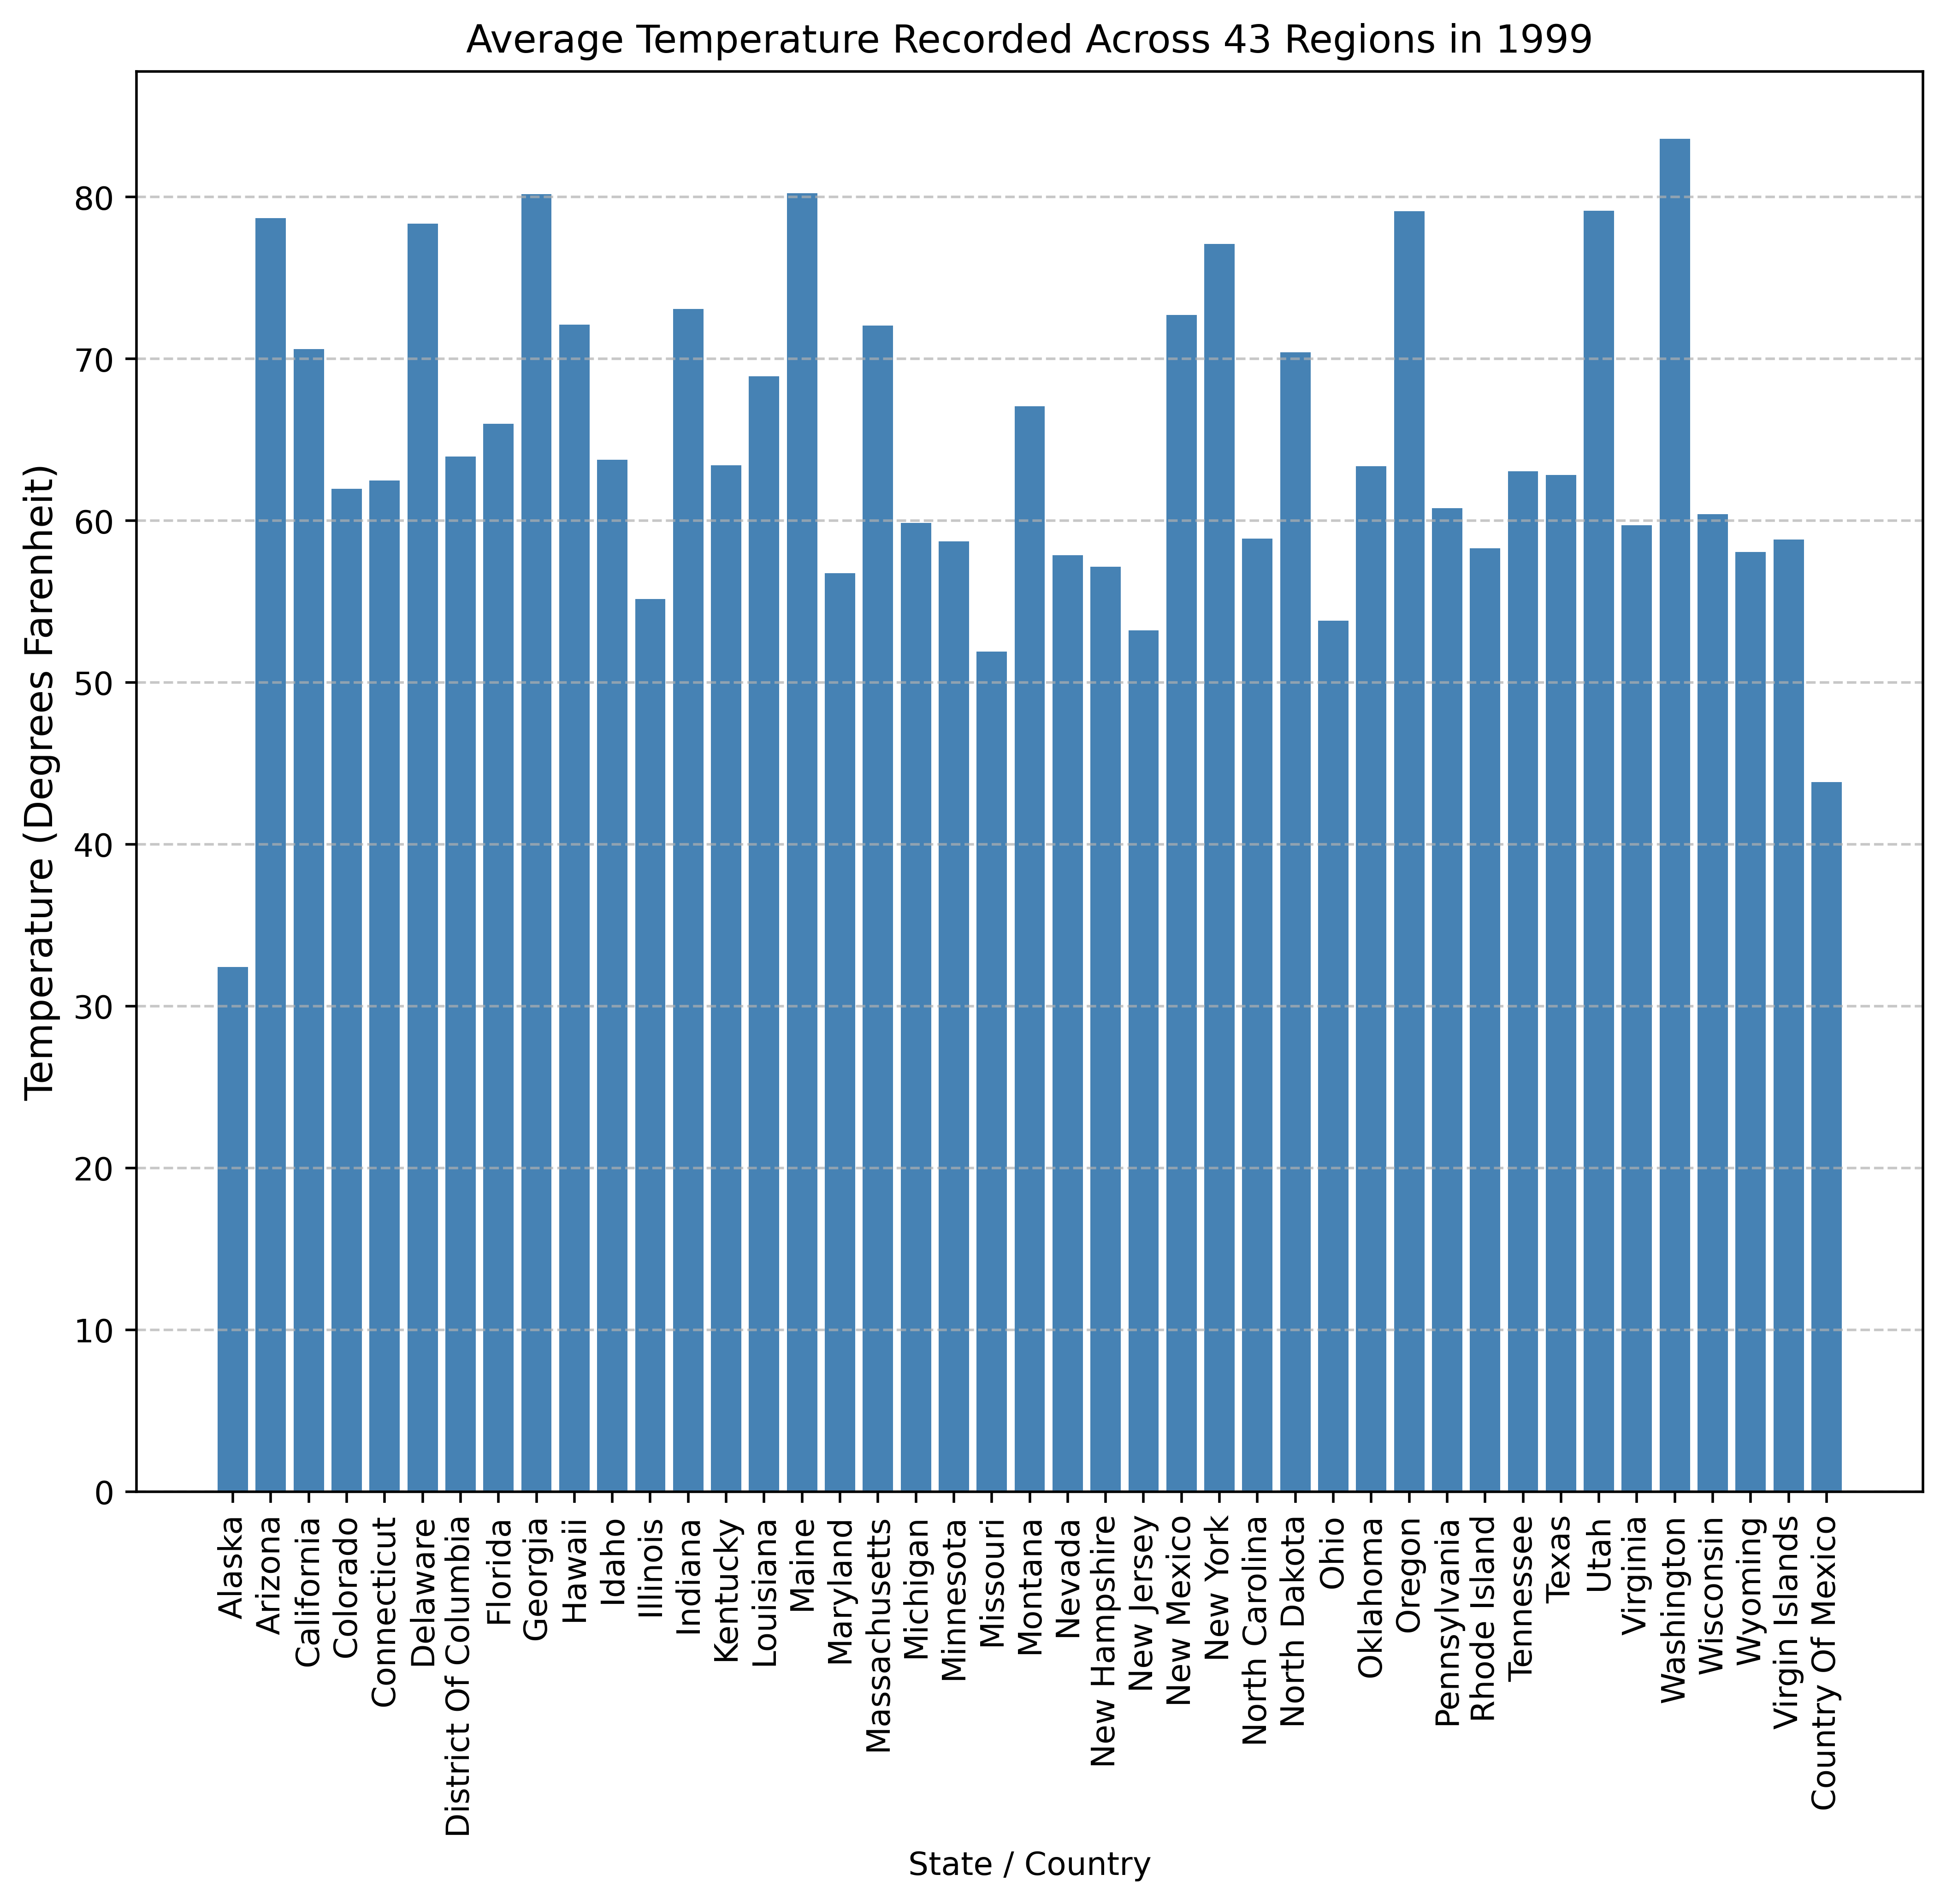

In [18]:
# Test State Comparison plot via temperature
file7 = download_driver(storage, 'Temperature', '1999', 'daily')
path7 = path_builder(file7)
# file7 = 'daily_TEMP_1999.csv'
temp_states_plot(path7, '1999')

# Testing input validation functions for years and dates


In [31]:

print(is_valid_date('2023-03-40')) 
print('Testing if march 40th is a valid date. Expect: Invalid calendar date!, False\n')

print(is_valid_date('19999-99999-99')) #
print('testing invalid date format. Expect: Invalid date format!, False\n')


print(extract_year('1999-05-05')) 
print('Testing year extraction. Expect 1999\n')

print(get_year_range(['AQI'], 'daily')) 
print('Testing get_year_range. Expect 1980-2023\n')

print(is_valid_year([1950,1960],1980)) 
print('Testing is_valid_year. Expect: Year is not in range! The range of years for this variable is 1950 to 1960. False')

print(is_valid_year([1950,1980],1980)) 
print("Expect: True")


Invalid calendar date!

False
Testing if march 40th is a valid date. Expect: Invalid calendar date!, False

Invalid date format!

False
testing invalid date format. Expect: Invalid date format!, False

1999
Testing year extraction. Expect 1999

['1980', '2023']
Testing get_year_range. Expect 1980-2023

Year is not in range!
The range of years for this variable is 1950 to 1960
False
Testing is_valid_year. Expect: Year is not in range! The range of years for this variable is 1950 to 1960. False
True
Expect: True


# Testing fucntions for state validation

In [33]:
print(is_valid_state('New York')) # New York
print(is_valid_state('NY')) # New York
print(is_valid_state('Old York')) # Returns None
print(is_valid_state('OY')) # Returns None

New York
New York
None
None
